In [1]:
%matplotlib notebook
import numpy as np
#import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('fruit_data_with_colors.txt')

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
import scipy.stats as sps
sns.set(style='whitegrid')

In [4]:
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [5]:
fruits.shape

(59, 7)

In [6]:
features = fruits.columns[-4:].tolist()

In [7]:
features

['mass', 'width', 'height', 'color_score']

In [8]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
# Creating a tuple to know the unique tipe label and fruit
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

<IPython.core.display.Javascript object>


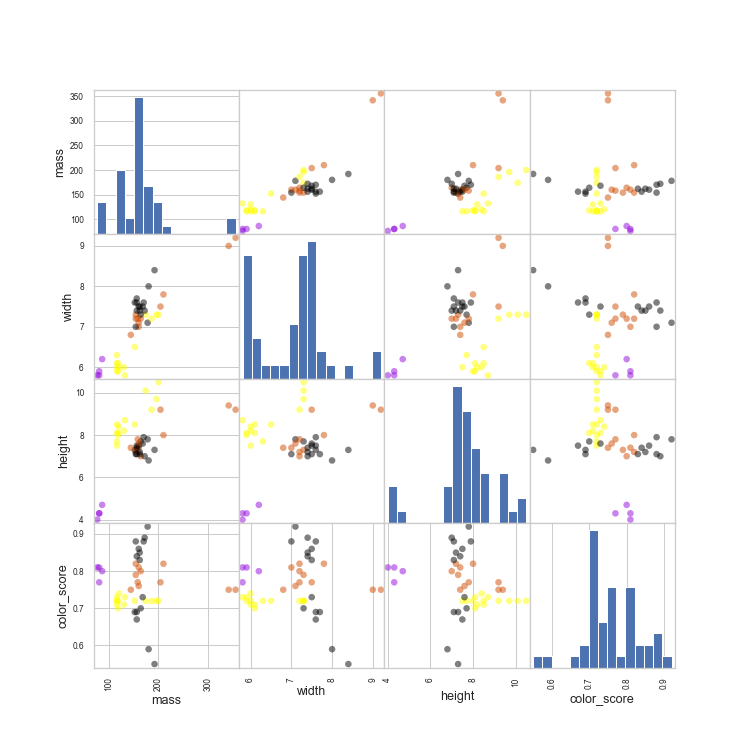

In [9]:
# plotting a scatter matrix
# importing colour map
from matplotlib import cm

X = fruits[features]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(10,10), cmap=cmap)

In [10]:
df_train = pd.concat([X_train, y_train],axis= 1)
df_train.head()

,mass,width,height,color_score,fruit_label
42,154,7.2,7.2,0.82,3
48,174,7.3,10.1,0.72,4
7,76,5.8,4.0,0.81,2
14,152,7.6,7.3,0.69,1
32,164,7.2,7.0,0.80,3


In [11]:
df_train.shape

(44, 5)

In [12]:
df_train['width'].max()

9.2

In [13]:
df_train['width'].min()

5.8

In [14]:
def corrfunc(x, y, **kws):
    (r, p) = sps.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

<IPython.core.display.Javascript object>


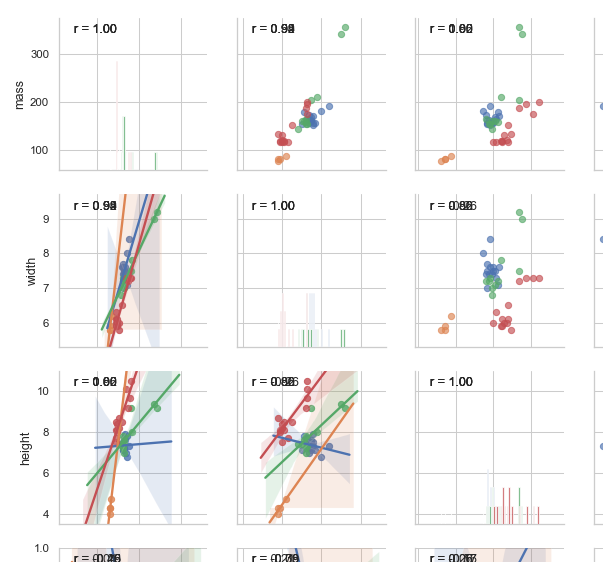

(3.5, 11.0)

In [15]:
# Other way to generate the same type of plot
fig = sns.PairGrid(df_train, hue='fruit_label', vars=features)
fig = fig.map_diag(plt.hist, bins=30, alpha=0.75)
fig = fig.map_upper(plt.scatter, alpha=0.65)
fig = fig.map_lower(sns.regplot)
fig = fig.add_legend()
fig = fig.map(corrfunc)
# Get hold of the axes objects (an array of axes)
axes = fig.axes
axes[3, 0].set_ylim(0.50, 1.0)
axes[1, 0].set_ylim(df_train['width'].min() - 0.5, df_train['width'].max() + 0.5)
axes[2, 0].set_ylim(df_train['height'].min() - 0.5, df_train['height'].max() + 0.5)

<IPython.core.display.Javascript object>


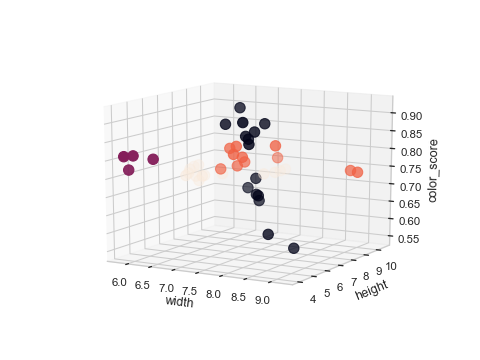

In [16]:

# plotting a 3D scatter plot
# https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
# https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html
from mpl_toolkits.mplot3d import Axes3D

figthree = plt.figure()
ax = figthree.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [17]:
# For this example, we use the mass, width, and height features of each fruit instance
X = fruits[['mass', 'width', 'height']]
y = fruits['fruit_label']

# default is 75% / 25% train-test split
# If we want to keep the same split the value of 'random_state' should be kept the same
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [18]:
X_train.head()

,mass,width,height
42,154,7.2,7.2
48,174,7.3,10.1
7,76,5.8,4.0
14,152,7.6,7.3
32,164,7.2,7.0


In [19]:
X_train.shape

(44, 3)

In [20]:
from sklearn.neighbors import KNeighborsClassifier


In [21]:
# instance of the classifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [22]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [23]:
# accurracy = TP + TN / (TP + TN + FP +FN): Fraction of items on the test_set whose ture label was accurately 
# predicted by the classifier
knn.score(X_test, y_test)

0.5333333333333333

In [24]:
X_test.head()

,mass,width,height
26,362,9.6,9.2
35,150,7.1,7.9
43,194,7.2,10.3
28,140,6.7,7.1
11,172,7.1,7.6


In [25]:
# Checking prediction
predict = knn.predict(X_test)

In [26]:
predict

array([3, 1, 4, 4, 1, 1, 3, 3, 1, 4, 2, 1, 3, 1, 4], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score
# evaluate accuracy
print(accuracy_score(y_test, predict))

0.5333333333333333


In [55]:
# first example: a small fruit with mass 20g, width 4.3 cm, height 5.5 cm, and 0.92 colore
example=[[20, 4.3, 20]]

In [56]:
fruit_prediction=knn.predict(example)
fruit_prediction[0]

1

In [57]:
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [50]:
lookup_fruit_name[fruit_prediction[0]]

'apple'

In [66]:
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 5, 'uniform')   # we choose 5 nearest neighbors

ModuleNotFoundError: No module named 'adspy_shared_utilities'

In [68]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].values
    y_mat = y.values
# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
plt.xlabel('height (cm)')
plt.ylabel('width (cm)')
#plt.title("4-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))    
plt.show()
plot_fruit_knn(X_train, y_train, 5, 'uniform')

<IPython.core.display.Javascript object>

NameError: name 'neighbors' is not defined

<IPython.core.display.Javascript object>


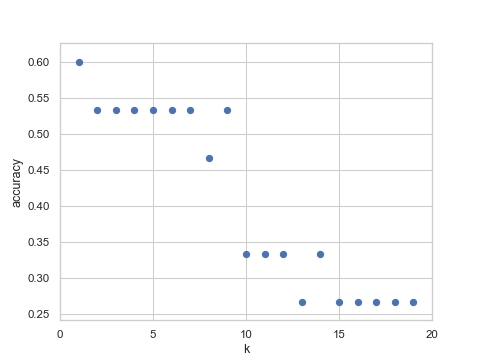

In [33]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

<IPython.core.display.Javascript object>


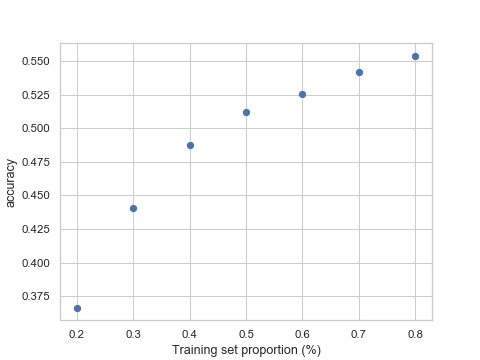

In [34]:
train_proportion = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in train_proportion:
    scores = []
    for i in range(1,1000):
        Xn_train, Xn_test, yn_train, yn_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(Xn_train, yn_train)
        scores.append(knn.score(Xn_test, yn_test))   
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

<IPython.core.display.Javascript object>


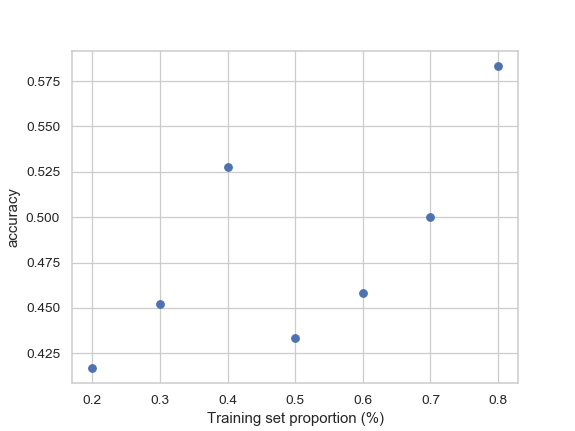

In [59]:
train_proportion = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in train_proportion:
    scores = []
    Xs_train, Xs_test, ys_train, ys_test = train_test_split(X, y, test_size = 1-s, random_state=0)
    knn.fit(Xs_train, ys_train)
    scores.append(knn.score(Xs_test, ys_test))

    plt.plot(s, scores, 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');

In [60]:
knn_2 = KNeighborsClassifier(n_neighbors = 5, metric='euclidean')
knn_2.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [61]:
predict_2 = knn_2.predict(X_test)
predict_2

array([3, 1, 4, 4, 1, 1, 3, 3, 1, 4, 2, 1, 3, 1, 4], dtype=int64)

In [62]:
print(accuracy_score(y_test, predict_2))

0.5333333333333333


In [63]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

np.set_printoptions(precision=2)


fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
# In the previous notebook we were having a dictionary istead as {1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

# MinMaxScaler, transforms features by scaling each feature to a given range.
# This estimator scales and translates each feature individually such that it is 
# in the given range on the training set, i.e. between zero and one.
# This transformation is often used as an alternative to zero mean, unit variance scaling.
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Fit to data, then transform it.
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00


In [64]:
example_fruit = [[5.5, 2.2, 10, 0.70]]
print('Prediction is:',knn.predict(example_fruit)[0])
print('To get the index in', target_names_fruits, 'we need to subract 1')
print('Predicted fruit type for ', example_fruit, ' is ', 
      target_names_fruits[knn.predict(example_fruit)[0]-1])

Prediction is: 3
To get the index in ['apple', 'mandarin', 'orange', 'lemon'] we need to subract 1
Predicted fruit type for  [[5.5, 2.2, 10, 0.7]]  is  orange


In [69]:
isinstance(X_train_scaled, (np.ndarray,))

True

In [70]:
X_train_scaled.shape

(44, 4)

In [71]:
X_train_scaled[: , :2]

array([[0.49, 0.41],
       [0.94, 0.44],
       [0.  , 0.  ],
       [0.51, 0.53],
       [0.46, 0.41],
       [0.72, 0.  ],
       [0.52, 0.35],
       [0.51, 0.44],
       [0.63, 0.03],
       [0.48, 0.5 ],
       [0.57, 0.15],
       [0.8 , 0.5 ],
       [0.48, 0.56],
       [0.05, 0.  ],
       [0.62, 0.59],
       [0.54, 0.53],
       [0.65, 0.06],
       [0.54, 0.5 ],
       [0.54, 0.06],
       [0.58, 0.38],
       [0.57, 0.44],
       [0.8 , 1.  ],
       [0.55, 0.5 ],
       [0.63, 0.09],
       [0.69, 0.21],
       [0.62, 0.03],
       [0.58, 0.41],
       [0.43, 0.65],
       [0.48, 0.35],
       [0.8 , 0.41],
       [0.83, 0.94],
       [0.05, 0.03],
       [0.6 , 0.53],
       [0.55, 0.38],
       [0.52, 0.47],
       [0.49, 0.47],
       [0.46, 0.47],
       [0.52, 0.29],
       [0.69, 0.09],
       [0.11, 0.12],
       [0.51, 0.76],
       [0.68, 0.06],
       [0.88, 0.44],
       [1.  , 0.44]])

In [72]:
isinstance(X_train, (pd.DataFrame,))

True

In [73]:
X_train.shape

(44, 4)

In [74]:
X_train.head()

,mass,width,height,color_score
42,154,7.2,7.2,0.82
48,174,7.3,10.1,0.72
7,76,5.8,4.0,0.81
14,152,7.6,7.3,0.69
32,164,7.2,7.0,0.80


In [75]:
### Plot the decision boundaries of the k-NN classifier
from adspy_shared_utilities import plot_fruit_knn
plot_fruit_knn(X_train_scaled, y_train, 5, 'uniform')   # we choose 5 nearest neighbors

ModuleNotFoundError: No module named 'adspy_shared_utilities'

In [76]:
# Both make_blobs and make_classification create multiclass datasets by allocating each class 
# one or more normally-distributed clusters of points
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])


# synthetic dataset for simple regression
# make_regression: Generate a random regression problem.
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()


# synthetic dataset for more complex regression
# non-linear relations: make_friedman1 is related by polynomial and sine transforms
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_friedman1.html#sklearn.datasets.make_friedman1
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression problem with one input variable')
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

plt.scatter(X_F1[:, 2], y_F1, marker= 'o', s=50)
plt.show()

ModuleNotFoundError: No module named 'adspy_shared_utilities'

In [77]:
# synthetic dataset for classification (binary) 
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

<IPython.core.display.Javascript object>

NameError: name 'cmap_bold' is not defined

In [78]:
# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
print('Labels assigned by blob: ', y_D2)
y_D2 = y_D2 % 2
print('Labels assigned by us as binary: ', y_D2)
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()

Labels assigned by blob:  [7 2 0 0 2 6 7 5 1 7 0 4 3 5 3 0 2 5 7 7 4 7 7 1 3 1 4 7 0 0 3 0 4 7 1 1 3
 0 5 7 6 4 2 6 0 2 4 4 0 4 5 2 3 5 5 6 2 3 3 5 5 1 6 3 5 2 3 3 7 0 2 0 7 2
 3 1 4 6 1 4 6 1 2 0 5 4 4 6 6 2 1 3 6 2 1 5 6 1 6 1]
Labels assigned by us as binary:  [1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1
 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1]


<IPython.core.display.Javascript object>

NameError: name 'cmap_bold' is not defined

In [79]:
y_train.as_matrix()

C:\Users\Isaac Sadikin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([3, 4, 2, 1, 3, 4, 3, 3, 4, 1, 4, 3, 1, 2, 3, 1, 4, 1, 4, 1, 1, 3,
       1, 4, 4, 4, 3, 1, 1, 4, 3, 2, 1, 3, 1, 1, 1, 3, 4, 2, 1, 4, 4, 4],
      dtype=int64)

In [83]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [84]:
fruits.dtypes

fruit_label        int64
fruit_name        object
fruit_subtype     object
mass               int64
width            float64
height           float64
color_score      float64
dtype: object